In [1]:
import os
#os.add_dll_directory(r"C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.6\bin")

import numpy as np
import cv2
import matplotlib.pyplot as plt
from depthwise_color_constancy import depthwise_color_constancy
from tqdm import tqdm

In [2]:
import csv
import time

data_dir = "../data/nyu_data/data"
data_collection = {}

with open(f"{data_dir}/nyu2_train.csv", 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:

        new_file_path = row[1].replace("nyu2_train", "nyu2_constancy")
        new_file_parent = "/".join(
                    new_file_path.split("/")[:-1]
        )

        rgb = cv2.imread(f"{data_dir}/../{row[0]}").astype(np.float32)/255
        depth = cv2.imread(f"{data_dir}/../{row[1]}").astype(np.float32)
        depth = depth#/depth.max()
        depth = depth.mean(axis=2)

        kernal_shape = np.array([
            [1,1,1],
            [1,1,1],
            [1,1,1]
        ]).astype(np.float32)
        
        start_time = time.time()
        a_c_new = depthwise_color_constancy(
            2000,
            0.9999,
            False,
            0.0,
            depth,
            kernal_shape,
            rgb
        ).reshape((480,640,3))
        data_collection[new_file_path] = {
            "time": time.time() - start_time
        }
        os.makedirs(f"{data_dir}/../{new_file_parent}", exist_ok=True)
        cv2.imwrite(f"{data_dir}/../{new_file_path}", a_c_new * 255)
        print(new_file_path)
        break

data/nyu2_constancy/living_room_0038_out/37.png


[ WARN:0@0.780] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.


In [3]:
cv2.imwrite(f"test.png", a_c_new * 255)

True

In [4]:
kernal_shape = np.array([
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1]
]).astype(np.float32)

start_time = time.time()
a_c_5 = depthwise_color_constancy(
    2000,
    0.9999,
    False,
    0.0,
    depth,
    kernal_shape,
    rgb
).reshape((480,640,3))

kernal_shape = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
]).astype(np.float32)

start_time = time.time()
a_c_3 = depthwise_color_constancy(
    2000,
    0.9999,
    False,
    0.0,
    depth,
    kernal_shape,
    rgb
).reshape((480,640,3))

((a_c_5 - a_c_3) ** 2).mean()

np.float32(0.1709968)

In [21]:
def compute_converagnce(depth, kernal_shape, rgb, iterations, p=0.9999, doesNaive=False, threshold=0.0):
    prev_image = rgb.reshape((480,640,3))

    mses = []

    for i in tqdm(range(0, iterations)):
        new_image = depthwise_color_constancy(
            1,
            p,
            doesNaive,
            threshold,
            depth,
            kernal_shape,
            prev_image
        ).reshape((480,640,3))
        mses.append(((rgb - new_image) ** 2).mean())
        prev_image = new_image
    return np.array(mses), new_image

kernal_shape = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
]).astype(np.float32)
mses0, a_c_new0 = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999)
kernal_shape = np.ones((3,3)).astype(np.float32)
mses1, a_c_new1 = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999)
kernal_shape = np.ones((5,5)).astype(np.float32)
mses2, a_c_new2 = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999)
kernal_shape = np.ones((7,7)).astype(np.float32)
mses3, a_c_new3 = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999)

kernal_shape = np.array([
    [1,0,1],
    [0,1,0],
    [1,0,1]
]).astype(np.float32)
mses4, a_c_new4 = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999)
kernal_shape = np.ones((3,3)).astype(np.float32)


  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:10<00:00, 188.57it/s]


True

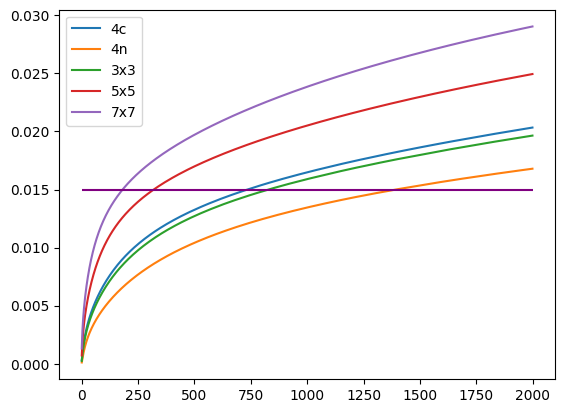

In [22]:
plt.plot(mses4, label="4c")
plt.plot(mses0, label="4n")
plt.plot(mses1, label="3x3")
plt.plot(mses2, label="5x5")
plt.plot(mses3, label="7x7")
plt.hlines(y=0.015, xmin=0, xmax=2000, colors="purple")
plt.legend()
cv2.imwrite(f"test.png", a_c_new * 255)

In [23]:
(
    ((a_c_new1 - a_c_new2) ** 2).mean(),
    ((a_c_new3 - a_c_new2) ** 2).mean(),
    ((a_c_new3 - a_c_new1) ** 2).mean(),
    ((a_c_new4 - a_c_new1) ** 2).mean(),
    ((a_c_new0 - a_c_new1) ** 2).mean(),
)

(np.float32(0.0015726986),
 np.float32(0.0006876584),
 np.float32(0.003953396),
 np.float32(0.000111145375),
 np.float32(0.00044630922))

In [24]:
# kernal_shape = np.ones((3,3)).astype(np.float32)
# mses1, a_c_new1 = compute_converagnce(depth, kernal_shape, rgb, int((mses1 < 0.015).sum()), p=0.9999)
# kernal_shape = np.ones((5,5)).astype(np.float32)
# mses2, a_c_new2 = compute_converagnce(depth, kernal_shape, rgb, int((mses2 < 0.015).sum()), p=0.9999)
# kernal_shape = np.ones((7,7)).astype(np.float32)
# mses3, a_c_new3 = compute_converagnce(depth, kernal_shape, rgb, int((mses3 < 0.015).sum()), p=0.9999)

In [25]:
cv2.imwrite(f"3x3_0015.png", a_c_new1 * 255)
cv2.imwrite(f"5x5_0015.png", a_c_new2 * 255)
cv2.imwrite(f"7x7_0015.png", a_c_new3 * 255)

True

# testing navie implementation

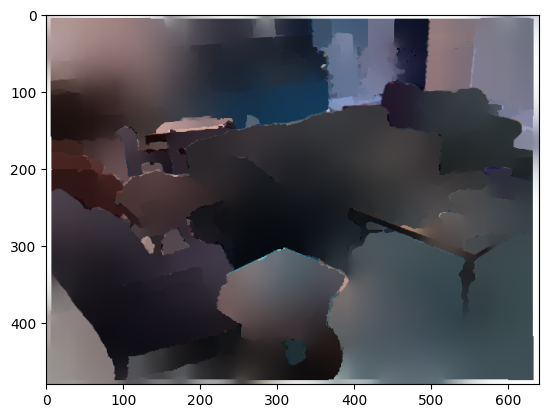

In [26]:
new_image = depthwise_color_constancy(
    2000,
    0.9999,
    True,
    2,
    depth,
    kernal_shape,
    rgb
).reshape((480,640,3))
plt.imshow(new_image)

In [27]:
kernal_shape = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
]).astype(np.float32)
mses0_naive, a_c_new0_naive = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999, doesNaive=True, threshold=2)
kernal_shape = np.ones((3,3)).astype(np.float32)
mses1_naive, a_c_new1_naive = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999, doesNaive=True, threshold=2)
kernal_shape = np.ones((5,5)).astype(np.float32)
mses2_naive, a_c_new2_naive = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999, doesNaive=True, threshold=2)
kernal_shape = np.ones((7,7)).astype(np.float32)
mses3_naive, a_c_new3_naive = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999, doesNaive=True, threshold=2)

kernal_shape = np.array([
    [1,0,1],
    [0,1,0],
    [1,0,1]
]).astype(np.float32)
mses4_naive, a_c_new4_naive = compute_converagnce(depth, kernal_shape, rgb, 2000, p=0.9999, doesNaive=True, threshold=2)


100%|██████████| 2000/2000 [00:10<00:00, 185.86it/s]


True

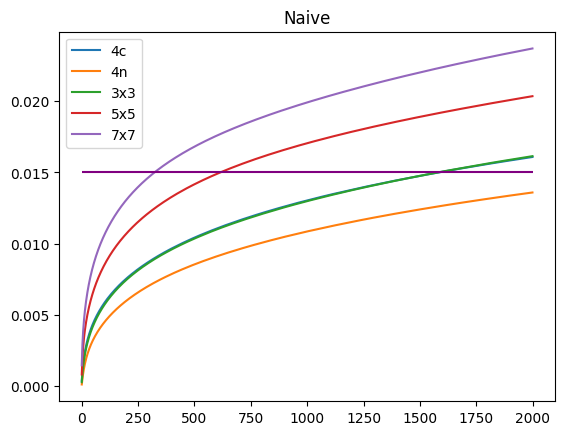

In [28]:
plt.plot(mses4_naive, label="4c")
plt.plot(mses0_naive, label="4n")
plt.plot(mses1_naive, label="3x3")
plt.plot(mses2_naive, label="5x5")
plt.plot(mses3_naive, label="7x7")
plt.title("Naive")
plt.hlines(y=0.015, xmin=0, xmax=2000, colors="purple")
plt.legend()
cv2.imwrite(f"test.png", a_c_new * 255)

True

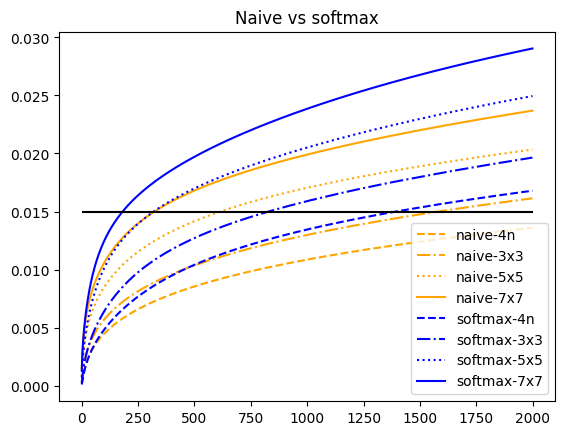

In [32]:
#plt.plot(mses4_naive, label="naive-4c", c="orange")
plt.plot(mses0_naive, label="naive-4n", c="orange", linestyle="--")
plt.plot(mses1_naive, label="naive-3x3", c="orange", linestyle="-.")
plt.plot(mses2_naive, label="naive-5x5", c="orange", linestyle=":")
plt.plot(mses3_naive, label="naive-7x7", c="orange")
#plt.plot(mses4, label="softmax-4c", c="blue")
plt.plot(mses0, label="softmax-4n", c="blue", linestyle="--")
plt.plot(mses1, label="softmax-3x3", c="blue", linestyle="-.")
plt.plot(mses2, label="softmax-5x5", c="blue", linestyle=":")
plt.plot(mses3, label="softmax-7x7", c="blue")
plt.title("Naive vs softmax")
plt.hlines(y=0.015, xmin=0, xmax=2000, colors="black")
plt.legend()
cv2.imwrite(f"test.png", a_c_new * 255)